In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sber = pd.read_csv('data/SBER_101001_171001.txt')
yndx = pd.read_csv('data/YNDX_101001_171001.txt')

In [3]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [4]:
res = pd.merge(sber, yndx, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20140604,0,87.81,118784670,YNDX,D,0,1170.0,35146
1,SBER,D,20140605,0,87.43,136633680,YNDX,D,0,1145.1,24973
2,SBER,D,20140606,0,89.00,127884670,YNDX,D,0,1163.0,7889
3,SBER,D,20140609,0,88.89,84744280,YNDX,D,0,1172.1,7304
4,SBER,D,20140610,0,88.99,85841300,YNDX,D,0,1170.0,3207


In [5]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

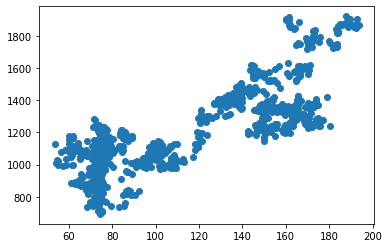

In [6]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [7]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1


In [8]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 754518.5925656324


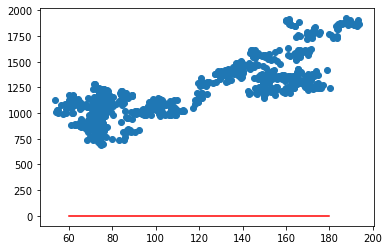

In [9]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 87657.19628240091


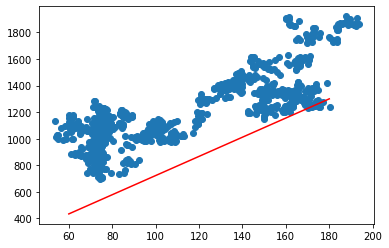

In [10]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [11]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err          
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors



In [12]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y, accuracy=0.03)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 31582.046995261022


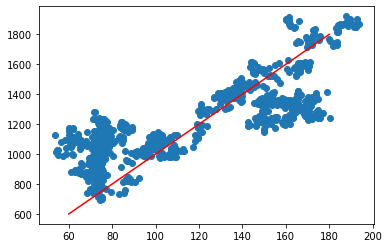

In [13]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

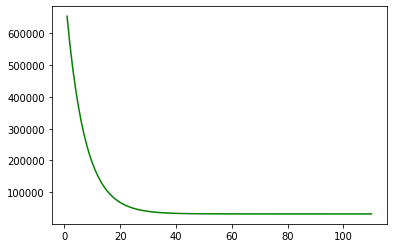

In [14]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## Контрольные вопросы
1.	Сформулируйте задачу регрессии.


Задачей регрессии является определение аналитической формы связи, в которой изменение результативного признака обусловлено влиянием одного или нескольких факторных признаков, а множество всех прочих факторов, также оказывающих влияние на результативный признак, принимается за постоянные и средние значения.

2.	Что такое метод наименьших квадратов?

Метод наименьших квадратов (МНК) — это математический метод, основанный на минимизации суммы квадратов отклонений некоторых функций от искомых переменных. 

3.	Какие функции ошибки используются в регрессионных моделях? Расскажите про три самые популярные.

Среднеквадратичная ошибка (MSE) - наиболее часто используемая функция ошибки регрессии. Метод расчета - найти квадратную сумму расстояния между прогнозируемым значением и истинным значением. 

Средняя абсолютная ошибка (MAE) - это сумма абсолютного значения разницы между целевым значением и прогнозируемым значением. 

Функция ошибки Хьюбера - для значений ошибки меньше дельты используется MSE, для значений ошибки больше, чем дельта, используется MAE

4.	Что показывает конкретное значение ошибки регрессии?

Конкретное значение ошибки регрессии показывает насколько хорошо подогнана модель под анализируемые данные

5.	Зачем нужно строить кривые обучения?


Кривые обучения позволяют выяснить, насколько модель выигрывает от добавления дополнительных обучающих данных